In [167]:
### IMPORTS ###
import struct
import numpy as np
import matplotlib.pyplot as plt

In [168]:
### SETTINGS ###
np.set_printoptions(precision=3, suppress=True, threshold=np.inf)

In [169]:
### FOLDER SETTINGS ###
input_folder = "../output/"
output_folder = "output/"

file_layout_path = input_folder + "/system_solution_layout.dat"  # Replace with your actual file path
file_solution_path = input_folder + "/system_solution.dat"  # Replace with your actual file path

In [170]:
format_string = '<d'  # '<d' for little-endian, '>d' for big-endian

In [171]:
### FUNCTIONS ###
def u_analytical_poisson_2d(global_domain_begin, global_indices, dx):
    point = global_domain_begin + (np.array(global_indices) - 1) * np.array(dx)
    func_val = np.prod(np.sin(np.pi * point))
    return func_val

In [172]:
with open(file_layout_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.int64)

    layout = data

layout = np.array(layout)

In [173]:
grid_size = layout[3:5]
num_processers_dim = layout[5:7]
total_processors = np.prod(num_processers_dim)

total_processors = np.prod(num_processers_dim)
block_sizes = grid_size // num_processers_dim

print(total_processors)

4


In [174]:
layout = layout.reshape((total_processors, 8))

print(layout)

[[ 0  0  0  8  8  2  2 16]
 [ 1  0  1  8  8  2  2 16]
 [ 2  1  0  8  8  2  2 16]
 [ 3  1  1  8  8  2  2 16]]


In [175]:
with open(file_solution_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)

    approximate_solution = data

approximate_solution = np.array(approximate_solution)

In [176]:
print("Approximate solution: ", approximate_solution)

Approximate solution:  [0.    0.    0.    0.    0.    0.191 0.345 0.43  0.    0.345 0.622 0.775
 0.    0.43  0.775 0.967 0.    0.    0.    0.    0.43  0.345 0.191 0.
 0.775 0.622 0.345 0.    0.967 0.775 0.43  0.    0.    0.43  0.775 0.967
 0.    0.345 0.622 0.775 0.    0.191 0.345 0.43  0.    0.    0.    0.
 0.967 0.775 0.43  0.    0.775 0.622 0.345 0.    0.43  0.345 0.191 0.
 0.    0.    0.    0.   ]


In [177]:
domain_begin = np.array([0.0, 0.0])
domain_end = np.array([1.0, 1.0])

In [178]:
# Reshape the data into a 2D array
approximate_solution = np.array(approximate_solution)
approximate_solution = approximate_solution.reshape(grid_size[0], grid_size[1])
approximate_solution = approximate_solution.reshape(total_processors, block_sizes[0], block_sizes[1])

In [179]:
true_solution = np.zeros((grid_size[0], grid_size[1]))
dx = abs(domain_end - domain_begin) / (grid_size - 1)

for i in range(1, grid_size[0] + 1):
    for j in range(1, grid_size[1] + 1):
        true_solution[i - 1, j - 1] = u_analytical_poisson_2d(domain_begin, [i, j], dx)

error = np.abs(approximate_solution - true_solution)
print("Max error: ", np.max(error))
print("Mean error: ", np.mean(error))
print("Std dev error: ", np.std(error))


ValueError: operands could not be broadcast together with shapes (4,4,4) (8,8) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NameError: name 'error' is not defined

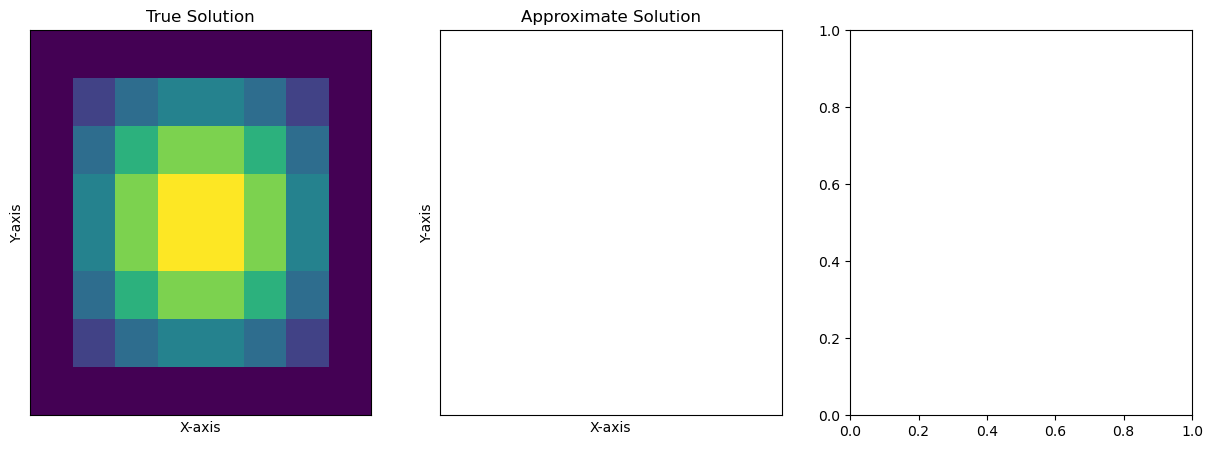

In [ ]:
# Plot the true solution, the approximate solution, and the error side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the true solution
im0 = axs[0].imshow(true_solution, cmap='viridis', aspect='auto')
axs[0].set_title('True Solution')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].grid(False)

# Plot the approximate solution
im1 = axs[1].imshow(approximate_solution, cmap='viridis', aspect='auto')
axs[1].set_title('Approximate Solution')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].grid(False)

# Plot the error
im2 = axs[2].imshow(error, cmap='viridis', aspect='auto')
axs[2].set_title('Error')
axs[2].set_xlabel('X-axis')
axs[2].set_ylabel('Y-axis')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].grid(False)

# Add a colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im2, cax=cbar_ax)
cbar.set_label('Error')

plt.show()
# Save the figures
fig.savefig(output_folder + "solution_comparison_im.png")

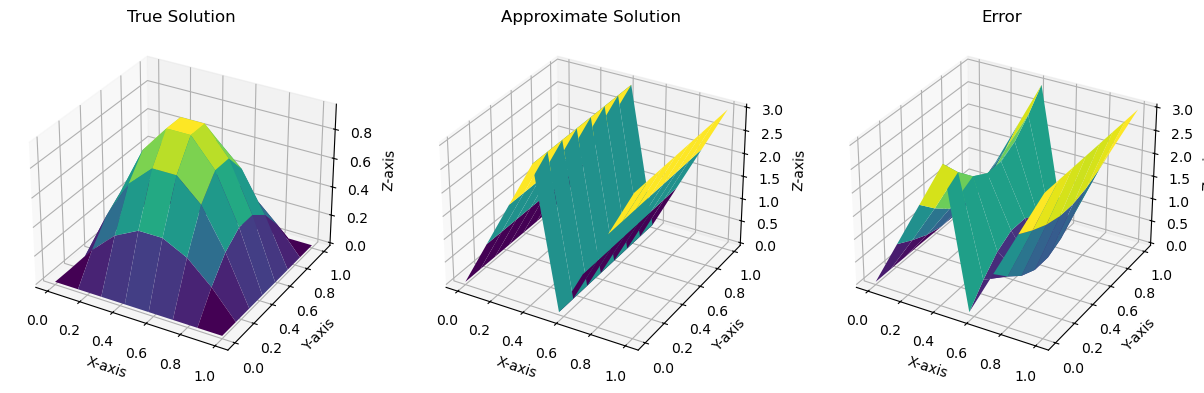

In [ ]:
# Create meshgrid for 3D plots
x = np.linspace(domain_begin[0], domain_end[0], grid_size[0])
y = np.linspace(domain_begin[1], domain_end[1], grid_size[1])
X, Y = np.meshgrid(x, y)

# Plot the true solution, the approximate solution, and the error side by side
fig = plt.figure(figsize=(15, 5))

# Plot the true solution
ax0 = fig.add_subplot(131, projection='3d')
ax0.plot_surface(X, Y, true_solution, cmap='viridis')
ax0.set_title('True Solution')
ax0.set_xlabel('X-axis')
ax0.set_ylabel('Y-axis')
ax0.set_zlabel('Z-axis')

# Plot the approximate solution
ax1 = fig.add_subplot(132, projection='3d')
ax1.plot_surface(X, Y, approximate_solution, cmap='viridis')
ax1.set_title('Approximate Solution')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')

# Plot the error
ax2 = fig.add_subplot(133, projection='3d')
surf = ax2.plot_surface(X, Y, error, cmap='viridis')
ax2.set_title('Error')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('Z-axis')

plt.show()

# Save the figures
fig.savefig(output_folder + "solution_comparison.png")


In [ ]:
#np.savetxt(output_folder + "approximate_solution.txt", approximate_solution, fmt='%.3f', delimiter=' ')
#np.savetxt(output_folder + "true_solution.txt", true_solution, fmt='%.3f', delimiter=' ')